<a href="https://colab.research.google.com/github/yoonyoung27/public_big_data_analysis/blob/main/Boston_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
train.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


* CRIM : 도시별 범죄발생률
* ZN : 25,000평을 넘는 토지의 비율
* INDUS : 도시별 비상업 지구의 비율
* CHAS : 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
* NOX : 일산화질소 농도
* RM : 주거 할 수 있는 평균 방의 개수
* AGE : 1940년 이전에 주어진 주택의 비율
* DIS : 5개의 고용지원센터까지의 가중치가 고려된 거리
* RAD : 고속도로의 접근 용이성에 대한 지표
* TAX : 10,000달러당 재산세 비율
* PTRATIO : 도시별 교사와 학생의 비율
* B : 도시의 흑인 거주 비율
* LSTAT : 저소득층의 비율
* MEDV : 본인 소유 주택 가격의 중앙값

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
url = "https://raw.githubusercontent.com/solaris33/data-science-for-all/main/lecture_4/weight-height.csv"
weight_height_df = pd.read_csv(url)

In [8]:
weight_height_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
weight_height_df.shape

(10000, 3)

In [10]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [11]:
weight_height_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


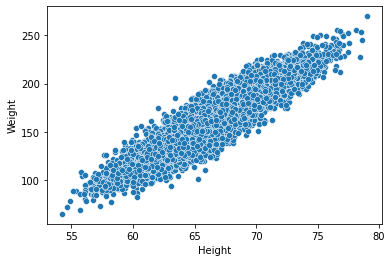

In [12]:
X = weight_height_df["Height"]
y = weight_height_df["Weight"]
sns.scatterplot(x = X, y = y)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [15]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 155.03093280324183
RMSE : 12.451141827288042


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

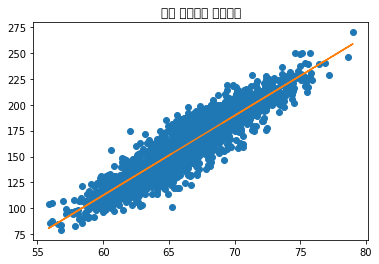

In [16]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('키와 몸무게의 상관관계')
plt.show()


In [17]:
boston_house_data = load_boston()

boston_house_df = pd.DataFrame(boston_house_data.data, columns = boston_house_data.feature_names)
boston_house_df['PRICE'] = boston_house_data.target
boston_house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
boston_house_df.shape

(506, 14)

In [19]:
boston_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
boston_house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
X = boston_house_df.iloc[:,:-1]
y = boston_house_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import preprocessing

X = boston_housde_df.iloc[:,:-1]
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
corr = boston_housde_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YllGnBu')
plt.title('특징들간의 Correlation')

In [ ]:
sns.regplot(data=boston_housde_df, x='RM', y='PRICE')
plt.show()